# Voltametria cíclica reversível com reação química homogênea acoplada
Assumindo a transferência reversível de 1 elétron seguida por uma reação química homogênea em equilíbrio:
$$
\text{O} + \text{ne}^- \rightleftharpoons \text{R}
$$
$$
\text{R} \leftrightharpoons \text{P}
$$
Assumindo eletrodo planar e considerando que as espécies O e R tem o mesmo coeficiente de difusão, $ \text{para} \quad  0\le \tau \le \tau_s \quad 
  \text{e} \quad 0 \le y \le 6 \sqrt{D \tau_s}$:

\begin{align}
  \frac{\partial c_O}{\partial \tau} &= D \frac{\partial^2 c_O}{\partial y^2} \\
  \frac{\partial c_R}{\partial \tau} &= D \frac{\partial^2 c_R}{\partial y^2}  -k_f*c_R + k_b*c_P\\
  \frac{\partial c_P}{\partial \tau} &= D \frac{\partial^2 c_P}{\partial y^2} + k_f*c_R - k_b*c_P
\end{align}

As condições inciais, assumindo R e P inicialmente ausentes, são:
\begin{align}
C_O(y,0) &= C_O^* \\
C_R(y,0) &= 0 \\
C_P(y,0) &= 0
\end{align}

A difusão semi-infinita é aplicada no seio da solução:
\begin{align} 
\lim_{y \to \infty} C_O(y,\tau) &= C_O^* \\
\lim_{y \to \infty} C_R(y,\tau) &= 0 \\
\lim_{y \to \infty} C_P(y,\tau) &= 0
\end{align}

A condição de equilíbrio interfacial (equação de Nernst) é aplicada na interface:

\begin{align}
E(t) &= E_i + v\tau, \quad \text{se} \quad \tau \leq \tau_\lambda \\ 
E(t) &= E_f - v(\tau-\tau_\lambda), \quad \text{se} \quad \tau_\lambda \leq \tau \leq 2\tau_\lambda
\end{align}
onde $v$ é a velocidade de varredura.
\begin{equation}
\theta = \exp \left(\frac{F}{RT}(E-E^0) \right)
\end{equation}

\begin{align}
C_O(0,\tau) &= (C_O^*-C_P)\frac{\theta}{1+\theta}  \quad \text{para} \, \tau>0 \\
C_R(0,\tau) &= (C_O^*-C_P)\frac{1}{1+\theta} \quad \text{para} \, \tau>0 \\
N_P(0,\tau) &= 0 \quad \text{para} \, \tau>0
\end{align}

Definindo as seguintes transformações de variáveis:

\begin{equation*}
x=\frac{y}{\sqrt{D \tau_s}}, \quad \tau_s = 1/fv
\end{equation*}

\begin{equation*}
t=\frac{\tau}{\tau_s}
\end{equation*}

\begin{equation*}
c_{O,R,P}=\frac{C_{O,R,P}}{C_O^*}
\end{equation*}

\begin{equation}
\eta = f(E-E^0)
\end{equation}

\begin{equation}
f = \frac{F}{RT}
\end{equation}

\begin{equation}
r = \frac{D_P}{D}
\end{equation}

As equações ficam, $ \quad \text {para} \quad 0 \le t \quad \text{e} \quad 0 \le x \le 6$:

\begin{align}
\tag{1.0a} 
\frac{\partial c_O}{\partial t} &=  \frac{\partial^2 c_O}{\partial x^2} \\
\tag{1.0b}
\frac{\partial c_R}{\partial t} &=  \frac{\partial^2 c_R}{\partial x^2} \\
\tag{1.0c}
\frac{\partial c_P}{\partial t} &=  r \frac{\partial^2 c_P}{\partial x^2}
\end{align}

E as condições iniciais e de contorno ficam:

\begin{align}
\tag{1.1a}
c_O(x,0)&=1 \\
\tag{1.1b}
c_R(x,0)&=0  \\
\tag{1.1c}
c_P(x,0)&=0
\end{align}

\begin{align}
\tag{1.2a}
\lim_{x \to \infty} c_O(x,t) &= 1 \\
\tag{1.2b}
\lim_{x \to \infty} c_R(x,t) &= 0 \\
\tag{1.2c}
\lim_{x \to \infty} c_P(x,t) &= 0
\end{align}

\begin{align}
\eta &= \eta_i + t \\
\theta &= \exp (f\eta) \\
\tag{1.3a}
c_O(0,t) &= (1-c_P)\frac{\theta}{1+\theta} \\
\tag{1.3b}
c_R(0,t) &= (1-c_P)\frac{1}{1+\theta} \\
\tag{1.3c}
N_P(0,t) &= 0
\end{align}

A densidade de corrente é limitada pelo fluxo difusional, logo:
\begin{equation*}
j(\tau) = nFD \left ( \frac{\partial C_O}{\partial y} \right )_{y=0} = nFD\frac{C_O^*}{\sqrt{D\tau_s}} \left ( \frac{\partial c}{\partial x} \right )_{x=0}
\end{equation*}

Definindo a corrente adimensional como $i(t)=\frac{j(\tau)}{nFD} \frac{\sqrt{D\tau}}{C_O^*}$:
\begin{equation*}
\tag{3.0}
i(t)=\left ( \frac{\partial c}{\partial x} \right )_{x=0}
\end{equation*}

Iniciamos importando as bibliotecas do pybamm e do python necessárias:
As equações são as mesmas da voltametria de corrente amostrada, porém o potencial varia linearmente segundo a equação:

In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import math
from scipy import special

## Definindo o modelo

Definindo a variável do modelo e a qual domínio ela pertence:

In [2]:
model = pybamm.BaseModel()

co = pybamm.Variable("Concentration of O", domain="electrolyte")
cr = pybamm.Variable("Concentration of R", domain="electrolyte")
cp = pybamm.Variable("Concentration of P", domain="electrolyte")

Definindo os parâmetros do modelo (Ei, Ef, e v agora são tratados como parâmetros do modelo, pois $\eta$ varia com o tempo):

In [3]:
Ei = pybamm.Parameter("Init Potential [V]")
Ef = pybamm.Parameter("Final Potential [V]")
E0 = pybamm.Parameter("Standard Potential [V]")
v = pybamm.Parameter("Scan rate [V.s-1]")
F = pybamm.Parameter("Faraday constant [C.mol-1]")
R = pybamm.Parameter("Molar gas constant [J.K-1.mol-1]")
T = pybamm.Parameter("Temperature [K]")
r = pybamm.Parameter("D ratio")
K = pybamm.Parameter("Equilibrium constant")
kf = pybamm.Parameter("Forward rate constant")

As equações são definidas em termos do fluxo e do divergente e adicionadas ao dicionário `model.rhs`

In [4]:
kb=kf/K
No = - pybamm.grad(co)  
Nr = -pybamm.grad(cr)
Np = -pybamm.grad(cp)
rhs_o = -pybamm.div(No)  
rhs_r = -pybamm.div(Nr)-kf*cr+kb*cp
rhs_p = -r*pybamm.div(Np)+kf*cr-kb*cp

model.rhs = {co: rhs_o, cr: rhs_r, cp: rhs_p}  # add the equation to rhs dictionary

Introduzindo as condições iniciais e de contorno:

In [5]:
# initial conditions
model.initial_conditions = {co: pybamm.Scalar(1), cr:pybamm.Scalar(0), cp:pybamm.Scalar(0)}

# boundary conditions
f = F/(R*T)
tf = 2*(Ef-Ei)/v
cosseno=pybamm.cos((np.pi / tf) * pybamm.t)
seno = pybamm.sin((np.pi/tf)*pybamm.t)
E =  Ei + (2 * (Ef-Ei) / np.pi) * np.abs(pybamm.arctan(seno/cosseno))
eta = E - E0
teta = pybamm.exp(f*eta)
cp0=pybamm.boundary_value(cp, "left")
left_co = (1-cp0)*teta/(1+teta) # Surface concentration by Nernst equation
left_cr = (1-cp0)*1/(1+teta) # Surface concentration by Nernst equation
left_cp = pybamm.Scalar(0)
right_co = pybamm.Scalar(1) #semi-infinite diffusion
right_cr = pybamm.Scalar(0) #semi-infinite diffusion
right_cp = pybamm.Scalar(0)
model.boundary_conditions = {co: {"left": (left_co, "Dirichlet"), "right": (right_co, "Dirichlet")},
                             cr: {"left": (left_cr, "Dirichlet"), "right": (right_cr, "Dirichlet")},
                             cp: {"left": (left_cp, "Neumann"), "right": (right_cp, "Dirichlet")}}

Adicionando as variáveis de interesse ao dicionário `model.variables`. $\eta$ é adicionado para plotar o voltamograma no pós-processamento.

In [6]:
model.variables = {"Concentration of O": co, "Flux of O": No, 
                   "Concentration of R": co, "Flux of R": Nr, 
                   "Concentration of P": cp, "Flux of P": Np,
                   "Applied potential": E}

## Usando o modelo

### Definindo a geometria e a malha

As variáveis espaciais são definidas independentemente das variáveis do modelo. O domínio 1D varia no intervalo $0 \le x \le 6$.

In [7]:
param = pybamm.ParameterValues(
    {
        "Init Potential [V]": "[input]",
        "Final Potential [V]": "[input]",
        "Standard Potential [V]": "[input]",
        "Scan rate [V.s-1]": "[input]",
        "Faraday constant [C.mol-1]": 96485.3,
        "Molar gas constant [J.K-1.mol-1]": 8.31446,
        "Temperature [K]": 298.15,
        "D ratio": 1,
        "Equilibrium constant": "[input]",
        "Forward rate constant": "[input]"
    }
)

In [8]:
# define geometry
x = pybamm.SpatialVariable(
    "x", domain=["electrolyte"], coord_sys="cartesian"
)
geometry = {"electrolyte": {x: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(6)}}}

In [9]:
param.process_model(model)
param.process_geometry(geometry)

Criando uma malha uniforme. A implementar : malha com expansão exponencial. (ver descrição abaixo)

In [10]:
# mesh and discretise
submesh_types = {"electrolyte": pybamm.Uniform1DSubMesh}
var_pts = {x: 400}
mesh = pybamm.Mesh(geometry, submesh_types, var_pts)

Example of meshes that do require parameters include the `pybamm.Exponential1DSubMesh` which clusters points close to one or both boundaries using an exponential rule. It takes a parameter which sets how closely the points are clustered together, and also lets the users select the side on which more points should be clustered. For example, to create a mesh with more nodes clustered to the right (i.e. the surface in the particle problem), using a stretch factor of 2, we pass an instance of the exponential submesh class and a dictionary of parameters into the `MeshGenerator` class as follows: `pybamm.MeshGenerator(pybamm.Exponential1DSubMesh, submesh_params={"side": "right", "stretch": 2})`

Discretizando por Volumes Finito. A testar: Elementos finitos.

In [11]:
spatial_methods = {"electrolyte": pybamm.FiniteVolume()}
disc = pybamm.Discretisation(mesh, spatial_methods)
disc.process_model(model);

### Resolvendo o modelo

O Solver ScipySolver é escolhido. Outras opções?. Definindo a malha uniforme no tempo. Como é feita a discretização no tempo? Como tratar stiff problems?  A implementar: comparação com soluções analiticas para corrente e concentração. 

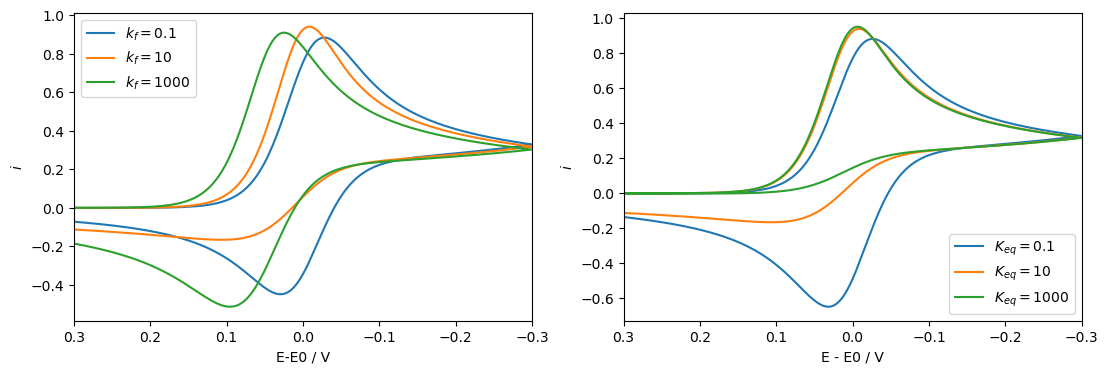

In [12]:
# soluções variando a a constante de equilíbrio e a cte de velocidade.
f=38.9217
solver = pybamm.ScipySolver()
currents_kf = []
currents_K = []
potentials_kf = []
potentials_K = []
labels_kf=[]
labels_K=[]
elow=0.3 # init potential
ehigh=-0.3 # end potential
v = -0.1

# soluções variando a cte de equilíbrio
keqs = [ 0.1, 10, 1000] # sweep rates
kf = 10
for Keq in keqs:
    tf=2*(ehigh-elow)/v
    t = np.linspace(0, tf, 1000)
    solution = solver.solve(model, t, inputs={"Init Potential [V]": elow, 
                                              "Final Potential [V]": ehigh, 
                                              "Standard Potential [V]": 0, 
                                              "Scan rate [V.s-1]": v,
                                              "Equilibrium constant": Keq,
                                              "Forward rate constant": kf})
    Na_sol = solution["Flux of O"]
    e_sol = solution["Applied potential"]
    i = -Na_sol(solution.t,x=0)
    E = e_sol(solution.t)
    currents_K.append(i)
    potentials_K.append(E)
    labels_K.append(str(Keq))

#soluções variando kf
kfs = [0.1, 10, 1000]
Keq = 10
for kf in kfs:
    tf=2*(ehigh-elow)/v
    t = np.linspace(0, tf, 1000)
    solution = solver.solve(model, t, inputs={"Init Potential [V]": elow, 
                                              "Final Potential [V]": ehigh, 
                                              "Standard Potential [V]": 0, 
                                              "Scan rate [V.s-1]": v,
                                              "Equilibrium constant": Keq,
                                              "Forward rate constant": kf})
    Na_sol = solution["Flux of O"]
    e_sol = solution["Applied potential"]
    i = -Na_sol(solution.t,x=0)
    E = e_sol(solution.t)
    currents_kf.append(i)
    potentials_kf.append(E)
    labels_kf.append(str(kf))


    
# plot
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(13, 4))

ax1.plot(potentials_kf[0],currents_kf[0],label="$k_f=$"+labels_kf[0])
ax1.plot(potentials_kf[1],currents_kf[1],label="$k_f=$"+labels_kf[1])
ax1.plot(potentials_kf[2],currents_kf[2],label="$k_f=$"+labels_kf[2])
ax1.set_xlabel("E-E0 / V")
ax1.set_ylabel("$i$")
ax1.set_xlim([elow,ehigh])
#ax1.set_ylim([0,6])
#plt.tight_layout()

ax2.plot(potentials_K[0],currents_K[0],label="$K_{eq}=$"+labels_K[0])
ax2.plot(potentials_K[1],currents_K[1],label="$K_{eq}=$"+labels_K[1])
ax2.plot(potentials_K[2],currents_K[2],label="$K_{eq}=$"+labels_K[2])
ax2.set_xlabel("E - E0 / V")
ax2.set_ylabel("$i$")
ax2.set_xlim([elow,ehigh])

ax1.legend(loc="upper left")
ax2.legend(loc="lower right")
plt.show()

In [13]:
# simulação da voltametria.
from ipywidgets import interact, Text, Layout, Button, Output
from IPython.display import display, clear_output

# solução
solver = pybamm.ScipySolver()
t = np.linspace(0.00001, 1, 1000)
f = 38.9217

output = Output() # define um widget output para capturar o gráfico e depois mostrá-lo com display

def plot_solution(ei,ef,e0, v, Keq, kf):
    with output:
        clear_output(wait=True) # limpa gráficos anteriormente gerados
        try:
            ei = float(ei)  # Garante que a entrada seja um número válido.
            ef = float(ef)
            e0 = float(e0)
            v = float(v)
            Keq = float(Keq)
            kf = float(kf)
        except ValueError:
            print("Por favor, insira um número válido")
            return
    
        tf=2*(ef-ei)/v
        t = np.linspace(0, tf, 1000)
        solution = solver.solve(model, t, inputs={"Init Potential [V]": ei,
                                                  "Final Potential [V]": ef,
                                                  "Standard Potential [V]": e0,
                                                  "Scan rate [V.s-1]": v,
                                                  "Equilibrium constant": Keq,
                                                  "Forward rate constant": kf})
        Na_sol = solution["Flux of O"]
        e_sol = solution["Applied potential"]
        i = -Na_sol(solution.t,x=0)
        E = e_sol(solution.t)
        
    
        # plot
        fig, ax1 = plt.subplots()

        ax1.plot(E,i,"r-",linewidth=1.5)
        ax1.set_xlabel("E / V")
        ax1.set_ylabel("Corrente")
        ax1.set_xlim([ei,ef])
        plt.tight_layout()
        plt.show()

# Cria um Text widget para velocidade de varredura
v_input = Text(value='-0.1', description= 'entre $v$ em $V\cdot s^{-1}$:', continuous_update=False,
                style={'description_width':'initial'})

# Cria um Text widget para entrada do potencial inicial
ei_input = Text(value='0.5', description= 'entre $ E_i $ em V :', continuous_update=False,
                style={'description_width':'initial'})

# Cria um Text widget para entrada do potencial final
ef_input = Text(value='-0.5', description= 'entre $ E_f $ em V :', continuous_update=False,
                style={'description_width':'initial'})

# Cria um Text widget para entrada do potencial padrão
e0_input = Text(value='0', description= 'entre $ E^0 $ em V :', continuous_update=False,
                style={'description_width':'initial'})

# Cria um Text widget para entrada da constante de equilíbrio
Keq_input = Text(value='10', description= 'entre $ K_{eq} $ :', continuous_update=False,
                style={'description_width':'initial'})

# Cria um Text widget para entrada da constante de velocidade
kf_input = Text(value='1', description= 'entre $k_f $  :', continuous_update=False,
                style={'description_width':'initial'})

# Cria um botão para recalcular a função
run_button = Button(description="Recalcular")

# Define um manipulador de eventos para o click no botão
def on_button_click(b):
    ei = ei_input.value
    ef = ef_input.value
    e0 = e0_input.value
    v = v_input.value
    Keq = Keq_input.value
    kf = kf_input.value
    if ei and ef and e0 and v and Keq and kf:  # Ensure both values are entered
        plot_solution(ei,ef,e0,v,Keq, kf)
        
# Link o click do botão com o manipulador de eventos
run_button.on_click(on_button_click)

# Mostra o gráfico default na primeira execução
plot_solution(ei_input.value, ef_input.value,e0_input.value,v_input.value,Keq_input.value,kf_input.value)

# mostra os widgets, incluindo o output
display(ei_input, ef_input, e0_input, v_input, Keq_input, kf_input, run_button, output)


Text(value='0.5', continuous_update=False, description='entre $ E_i $ em V :', style=TextStyle(description_wid…

Text(value='-0.5', continuous_update=False, description='entre $ E_f $ em V :', style=TextStyle(description_wi…

Text(value='0', continuous_update=False, description='entre $ E^0 $ em V :', style=TextStyle(description_width…

Text(value='-0.1', continuous_update=False, description='entre $v$ em $V\\cdot s^{-1}$:', style=TextStyle(desc…

Text(value='10', continuous_update=False, description='entre $ K_{eq} $ :', style=TextStyle(description_width=…

Text(value='1', continuous_update=False, description='entre $k_f $  :', style=TextStyle(description_width='ini…

Button(description='Recalcular', style=ButtonStyle())

Output()